In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
  ##IMPORTING LIBRARIES FOR PREPROCESSING AND VISUALIZATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
plt.style.use('dark_background')


df=pd.read_csv("/content/drive/MyDrive/Copy of zomato (1).csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [ ]:
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
#DROPING COLUMNS
df = df.drop(['url','address','phone','menu_item','dish_liked','reviews_list','listed_in(city)'], axis=1)
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [ ]:
#DROPPING DUPLICATES
df.drop_duplicates(inplace = True)
df.shape


(35011, 10)

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#HANDLING RATE VALUES
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

df['rate'] = df['rate'].apply(handlerate)
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35011, dtype: float64

In [ ]:
#FILLING MISSING RATE VALUES UING MEAN
df['rate'].fillna(df['rate'].mean(), inplace =True)
df['rate'].isnull().sum()

0

In [ ]:
²df.dropna(inplace = True)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.730491,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.730491,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#RENAMING COLUMN WITH A SMALLER NAME
df.rename(columns={'approx_cost(for two people)':'cost2plates','listed_in(type)':'type'}, inplace =True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
#HANDLING ',' VALUES IN THE DATA
def handlecomma(value):

  value=str(value)
  if ',' in value:
    value=value.replace(',','')
    return float(value)
  else:
    return float(value)
df['cost2plates'] = df['cost2plates'].apply(handlecomma)
df['cost2plates']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost2plates, Length: 34636, dtype: float64

In [ ]:
rest_type=df['rest_type'].value_counts(ascending = False)
rest_type

rest_type
Quick Bites                   12123
Casual Dining                  7533
Cafe                           2578
Delivery                       1502
Dessert Parlor                 1491
                              ...  
Bakery, Sweet Shop                1
Mess, Quick Bites                 1
Pop Up                            1
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Name: count, Length: 93, dtype: int64

In [ ]:
#Making Rest Types less than 1000 in frequency as others
rest_types_lessthan1000 = rest_type[rest_type<1000]

def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value

df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()


rest_type
Quick Bites           12123
others                 8193
Casual Dining          7533
Cafe                   2578
Delivery               1502
Dessert Parlor         1491
Takeaway, Delivery     1216
Name: count, dtype: int64

In [ ]:
#Making Rest Types less than 300 in frequency as others
location = df['location'].value_counts(ascending  = False)
location_lessthan300 = location[location<300]
def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value

df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
others                   4838
BTM                      2484
Whitefield               1945
HSR                      1753
Indiranagar              1747
Marathahalli             1649
Koramangala 5th Block    1605
JP Nagar                 1400
Jayanagar                1242
Electronic City          1212
Bellandur                1120
Bannerghatta Road        1052
Sarjapur Road             933
Brigade Road              687
Koramangala 7th Block     624
Brookefield               598
Koramangala 6th Block     590
Koramangala 4th Block     587
Kalyan Nagar              584
New BEL Road              582
Banashankari              571
Malleshwaram              556
MG Road                   554
Ulsoor                    546
Koramangala 1st Block     539
Frazer Town               469
Basavanagudi              463
Rajajinagar               462
Church Street             446
Banaswadi                 427
Residency Road            423
Kammanahalli              417
Old Airport Road          401
L

In [ ]:

cuisines = df['cuisines'].value_counts(ascending  = False)
cuisines_lessthan100 = cuisines[cuisines<100]
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                                              19621
North Indian                                         1895
North Indian, Chinese                                1561
South Indian                                         1172
Bakery, Desserts                                      591
Biryani                                               557
Fast Food                                             485
South Indian, North Indian, Chinese                   475
Desserts                                              447
Cafe                                                  447
Bakery                                                385
Chinese                                               337
Ice Cream, Desserts                                   304
Mithai, Street Food                                   256
Chinese, North Indian                                 249
North Indian, Chinese, Biryani                        234
Desserts, Ice Cream                                   226
North

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

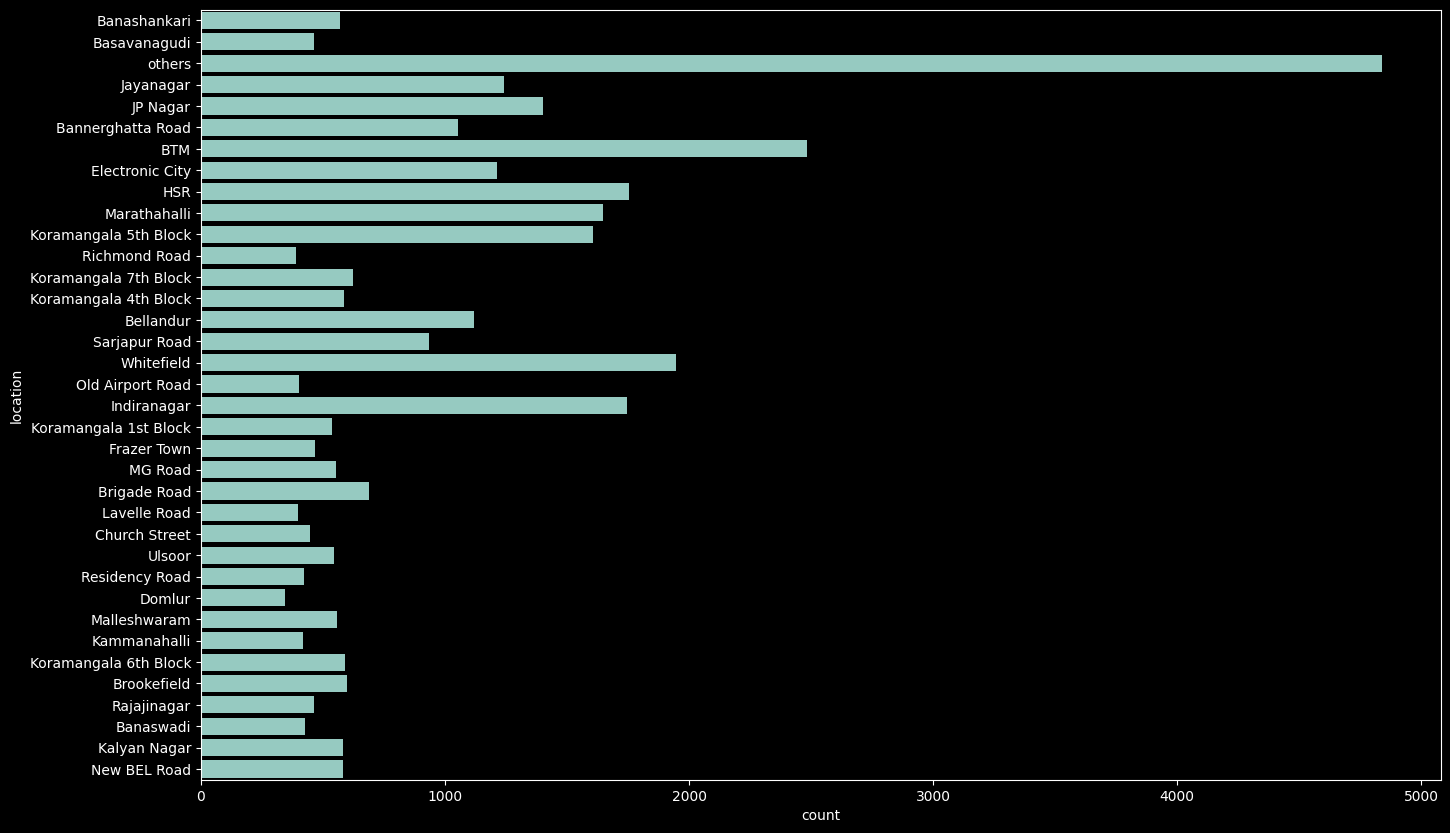

In [ ]:
plt.figure(figsize= (16,10))
sns.countplot(df['location'])
plt.xticks(rotation=360)

<ipython-input-22-96d8161e8574>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['online_order'], palette = 'inferno')


<Axes: xlabel='count', ylabel='online_order'>

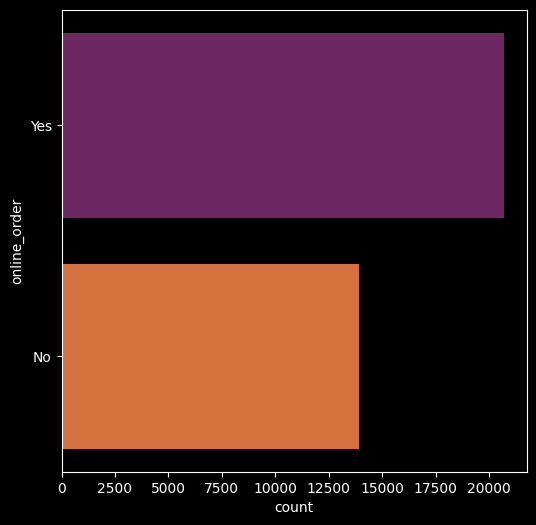

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(df['online_order'], palette = 'inferno')

<ipython-input-23-492bf8f2e297>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['book_table'], palette = 'rainbow')


<Axes: xlabel='count', ylabel='book_table'>

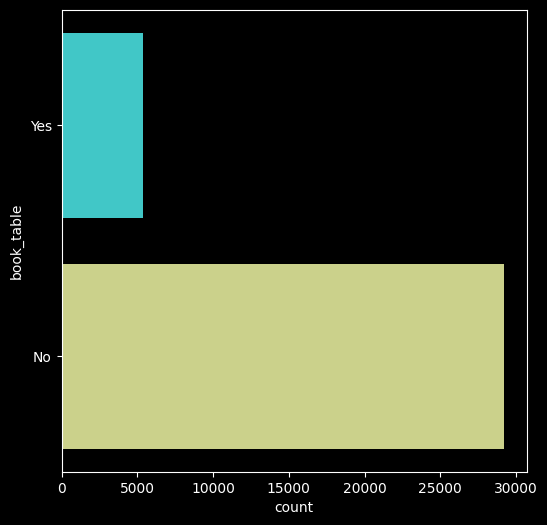

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(df['book_table'], palette = 'rainbow')

<Axes: xlabel='book_table', ylabel='rate'>

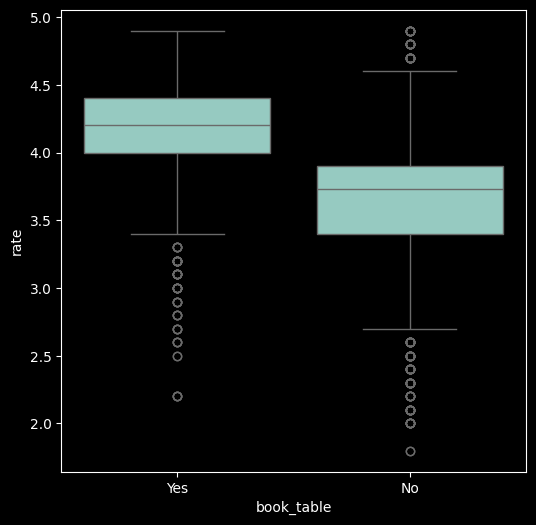

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

<Axes: xlabel='book_table', ylabel='rate'>

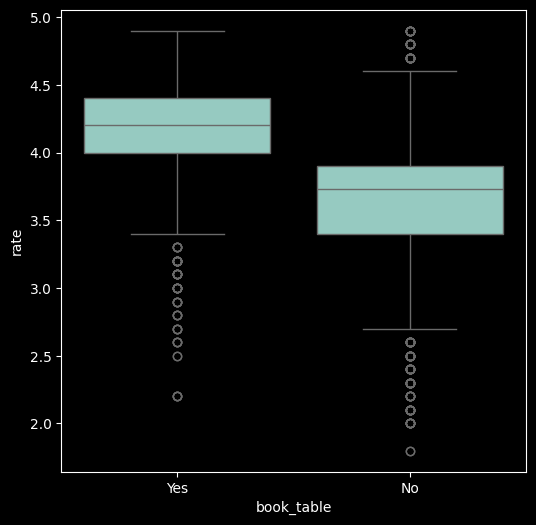

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

In [ ]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                     802  1682
Banashankari            260   311
Banaswadi               208   219
Bannerghatta Road       399   653
Basavanagudi            182   281
Bellandur               437   683
Brigade Road            293   394
Brookefield             206   392
Church Street           182   264
Domlur                  187   158
Electronic City         657   555
Frazer Town             206   263
HSR                     438  1315
Indiranagar             647  1100
JP Nagar                562   838
Jayanagar               380   862
Kalyan Nagar            240   344
Kammanahalli            176   241
Koramangala 1st Block   148   391
Koramangala 4th Block   279   308
Koramangala 5th Block   580  1025
Koramangala 6th Block   211   379
Koramangala 7th Block   190   434
Lavelle Road            237   159
MG Road                 297   257
Malleshwaram            224   332
Marathahalli            628  1021
New BEL Road            250   332
Old Airport Road        201   200
Rajajinagar             214   248
Residency Road          276   147
Richmond Road           249   140
Sarjapur Road           282   651
Ulsoor                  201   345
Whitefield              880  1065
others                 2106  2732

<Axes: xlabel='location'>

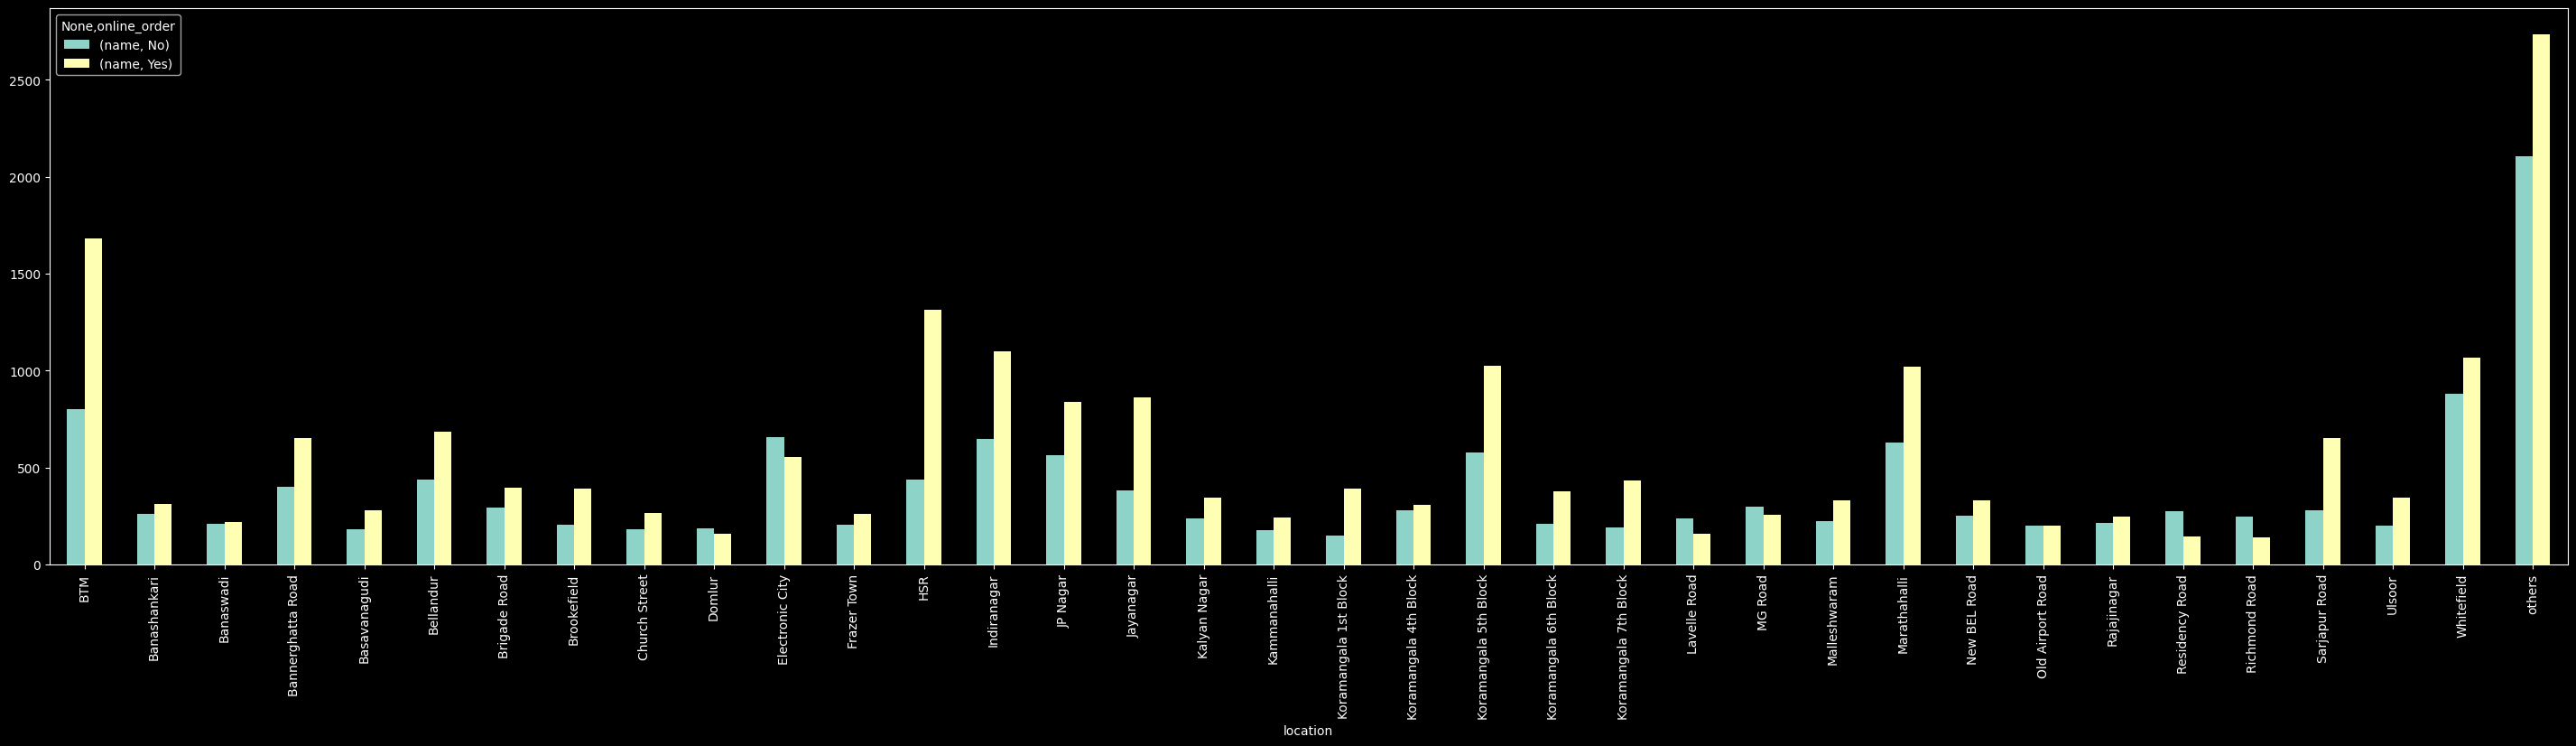

In [ ]:
df1.plot(kind = 'bar', figsize = (36,8))


In [ ]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    2358  126
Banashankari            528   43
Banaswadi               421    6
Bannerghatta Road       973   79
Basavanagudi            451   12
Bellandur              1024   96
Brigade Road            541  146
Brookefield             525   73
Church Street           279  167
Domlur                  300   45
Electronic City        1116   96
Frazer Town             461    8
HSR                    1566  187
Indiranagar            1310  437
JP Nagar               1148  252
Jayanagar              1015  227
Kalyan Nagar            466  118
Kammanahalli            383   34
Koramangala 1st Block   497   42
Koramangala 4th Block   340  247
Koramangala 5th Block  1004  601
Koramangala 6th Block   509   81
Koramangala 7th Block   494  130
Lavelle Road            195  201
MG Road                 286  268
Malleshwaram            475   81
Marathahalli           1492  157
New BEL Road            527   55
Old Airport Road        343   58
Rajajinagar             422   40
Residency Road          306  117
Richmond Road           308   81
Sarjapur Road           786  147
Ulsoor                  433  113
Whitefield             1693  252
others                 4259  579

<Axes: xlabel='location'>

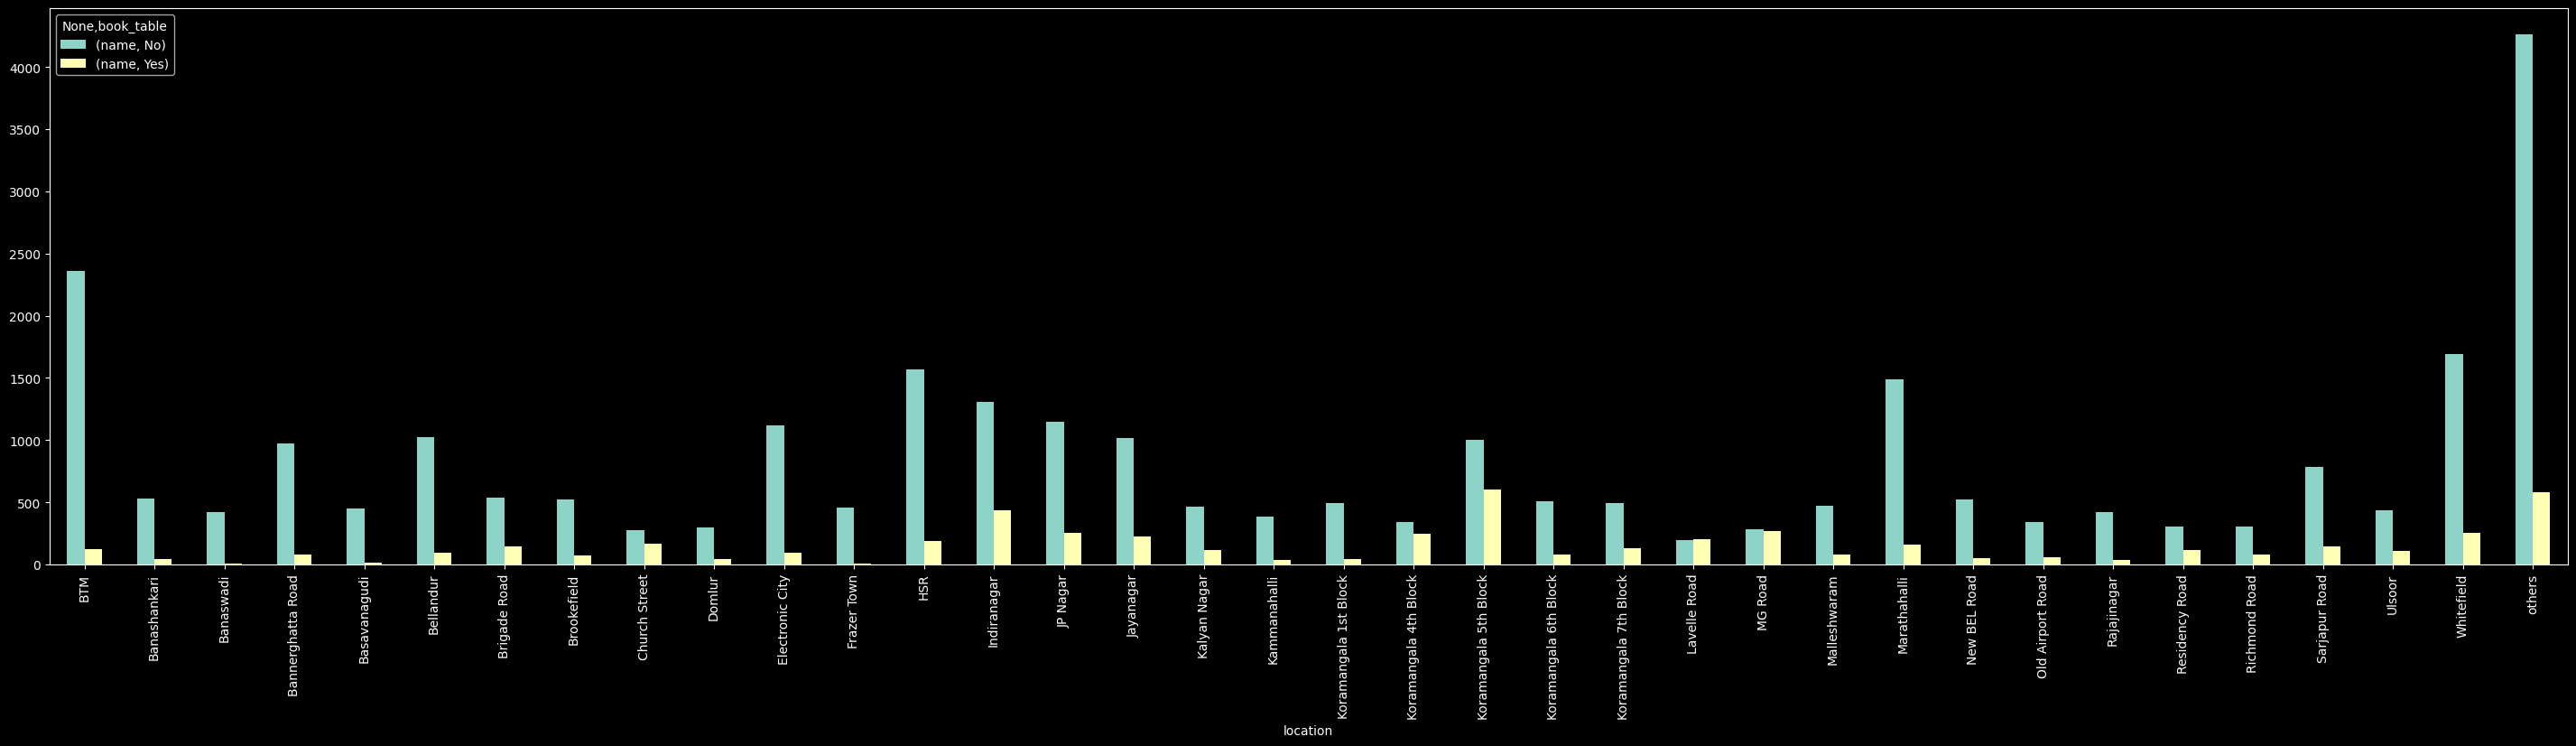

In [ ]:
df2.plot(kind = 'bar', figsize = (36,8))

In [ ]:
df3 = df.groupby(['location','type'])['name'].count()
df3.to_csv('location_type.csv')
df3 = pd.read_csv('location_type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       15    46     1418      110      866   
Banashankari               5    24      243       46      246   
Banaswadi                  0    13      157       19      233   
Bannerghatta Road          8    27      510       92      404   
Basavanagudi               4     8      195       45      208   
Bellandur                 28    34      513       70      442   
Brigade Road              13    24      249       55      273   
Brookefield                6    17      299       42      230   
Church Street             19    44      138       21      172   
Domlur                    11    12      168       24      108   
Electronic City           22    24      548       71      505   
Frazer Town                1    10      267       46      141   
HSR                       14    42     1076      108      484   
Indiranagar               38    97      830      136      515   
JP Nagar                  25    41      629      104      554   
Jayanagar                 19    50      560      118      483   
Kalyan Nagar               9    24      188       45      303   
Kammanahalli               2    14      160       18      220   
Koramangala 1st Block      3    14      319       32      156   
Koramangala 4th Block     13    43      249       38      163   
Koramangala 5th Block     51   118      626      135      542   
Koramangala 6th Block     12    30      277       48      180   
Koramangala 7th Block     19    30      247       69      215   
Lavelle Road              24    22       87       28      158   
MG Road                   32    55      138       37      221   
Malleshwaram              11    24      197       63      231   
Marathahalli              34    30      874       94      594   
New BEL Road               4    29      277       33      223   
Old Airport Road          12     5      174       34      155   
Rajajinagar                9     4      196       44      196   
Residency Road            14    19      106       38      186   
Richmond Road             41    13      110       37      172   
Sarjapur Road             23    19      473       78      299   
Ulsoor                    12    32      217       38      216   
Whitefield                28    50      934      128      726   
others                    88   150     2346      308     1763   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   15            14  
Banashankari                           7             0  
Banaswadi                              4             1  
Bannerghatta Road                      9             2  
Basavanagudi                           3             0  
Bellandur                             17            16  
Brigade Road                          51            22  
Brookefield                            4             0  
Church Street                         31            21  
Domlur                                11            11  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            15  
Indiranagar                           65            66  
JP Nagar                              40             7  
Jayanagar                             12             0  
Kalyan Nagar                          15             0  
Kammanahalli                           3             0  
Koramangala 1st Block                  5            10  
Koramangala 4th Block                 50            31  
Koramangala 5th Block                 75            58  
Koramangala 6th Block                 25            18  
Koramangala 7th Block                 22            22  
Lavell

<Axes: xlabel='location'>

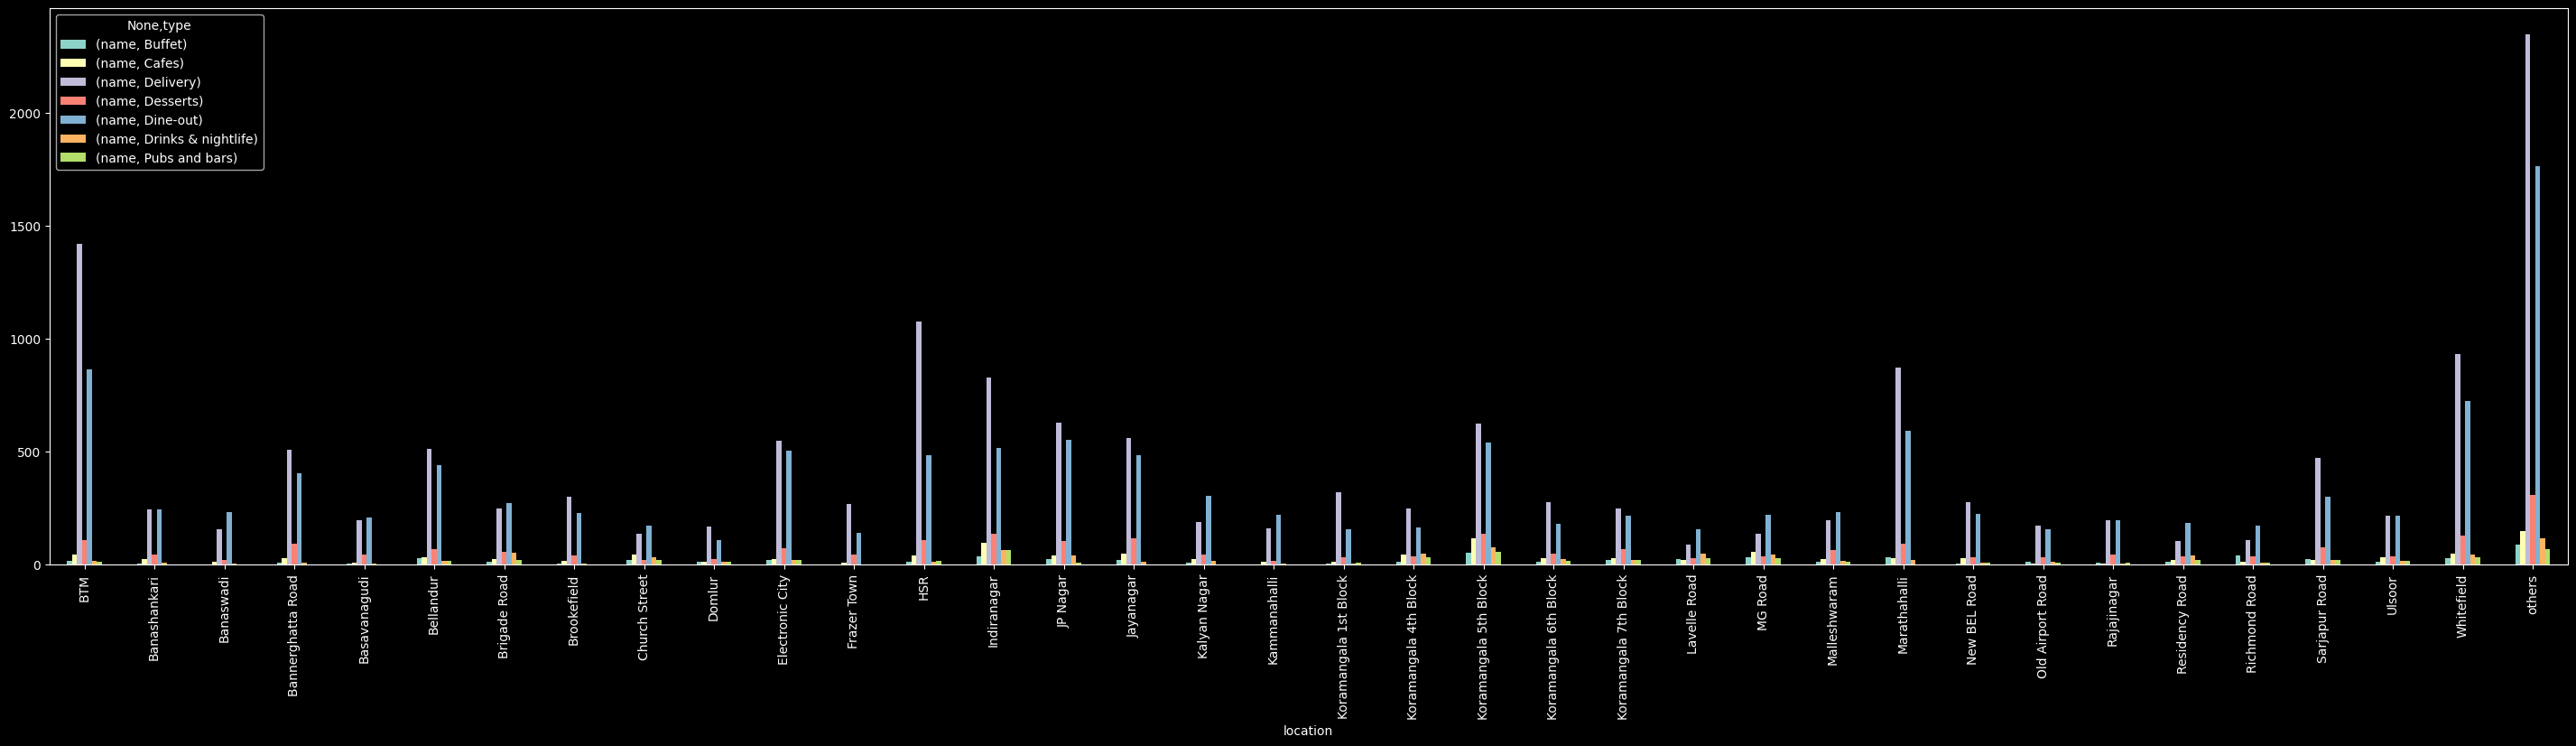

In [ ]:
df3.plot(kind = 'bar', figsize = (36,8))

In [ ]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()


,votes
location,
Koramangala 5th Block,1984132
Indiranagar,1129994
others,1016001
Koramangala 4th Block,591240
Church Street,555228


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Koramangala 4th Block'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'Whitefield'),
  Text(7, 0, 'Lavelle Road'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Koramangala 7th Block'),
  Text(11, 0, 'BTM'),
  Text(12, 0, 'Jayanagar'),
  Text(13, 0, 'Sarjapur Road'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'MG Road'),
  Text(16, 0, 'Koramangala 6th Block'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Malleshwaram'),
  Text(19, 0, 'Bellandur'),
  Text(20, 0, 'Bannerghatta Road'),
  Text(21, 0, 'Koramangala 1st Block'),
  Text(22, 0, 'New BEL Road'),
  Text(23, 0, 'Old Airport Road'),
  Text(24, 0, 'Kalyan Nagar'),
  Text(25, 0

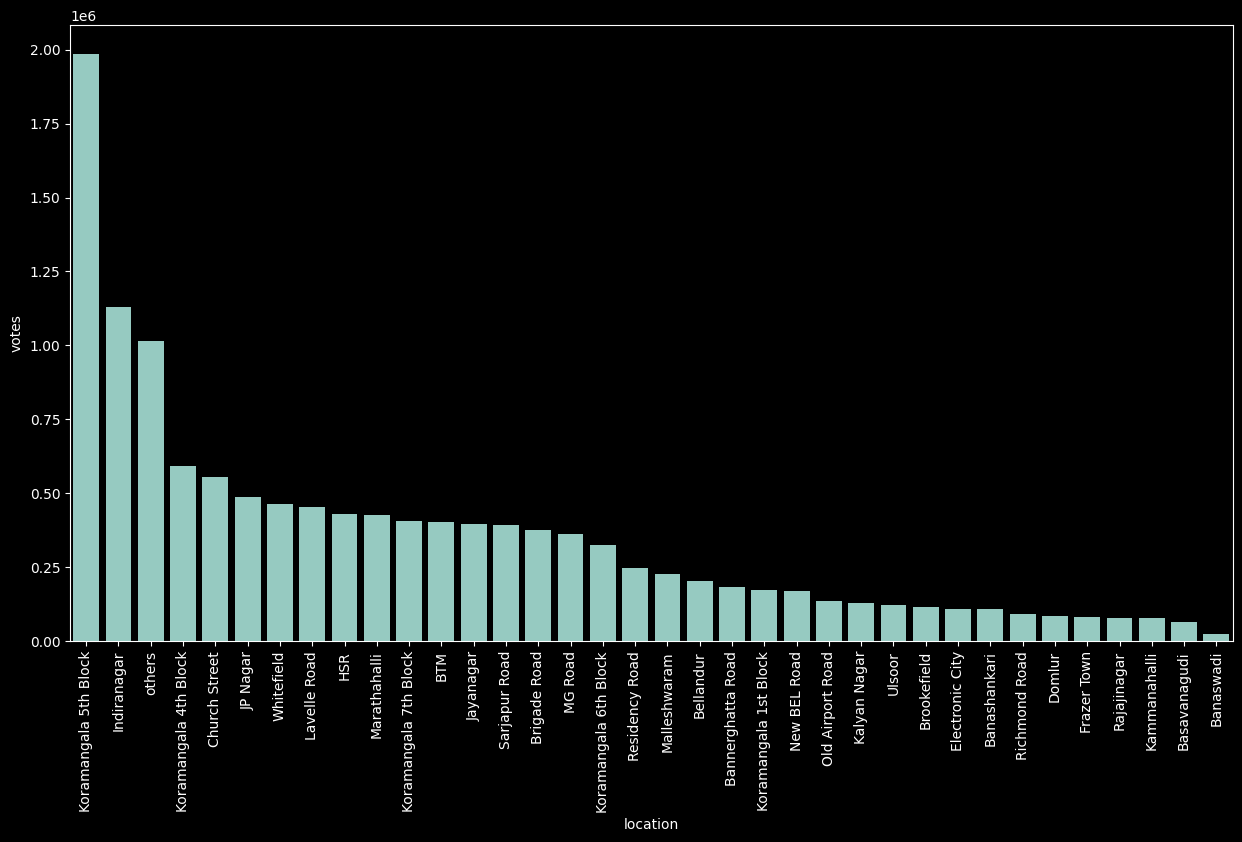

In [ ]:
df6 = df.groupby('location')['votes'].sum().reset_index()
plt.figure(figsize = (15,8))
sns.barplot(x='location', y='votes',data=df5)
plt.xticks(rotation = 90)

<ipython-input-34-fe9bca5aceca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'type', y = 'rate', data = df, palette = 'inferno' , color="white" )


<Axes: xlabel='type', ylabel='rate'>

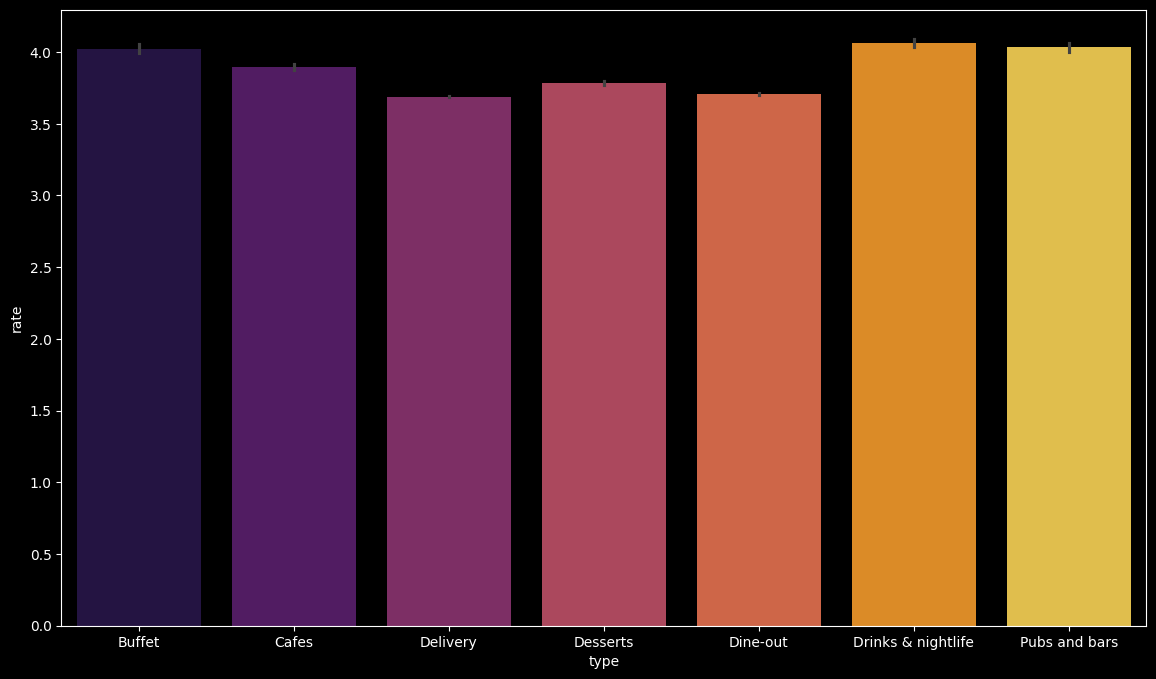

In [ ]:
plt.figure(figsize = (14, 8))
sns.barplot(x = 'type', y = 'rate', data = df, palette = 'inferno' , color="white" )

In [ ]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,others,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.730491,0,Whitefield,others,Finger Food,600.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.730491,0,Whitefield,others,Finger Food,2000.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,others,others,Finger Food,2500.0,Pubs and bars


In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])
df['online_order'] = le.fit_transform(df['online_order'])
df['book_table'] = le.fit_transform(df['book_table'])
df['location'] = le.fit_transform(df['location'])
df['rest_type'] = le.fit_transform(df['rest_type'])
df['cuisines'] = le.fit_transform(df['cuisines'])
df['type'] = le.fit_transform(df['type'])

df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,3664,1,1,4.1,775,1,1,53,800.0,0
1,6968,1,0,4.1,787,1,1,53,800.0,0
2,6449,1,0,3.8,918,1,6,53,800.0,0
3,198,0,0,3.7,88,1,4,49,300.0,0
4,2919,0,0,3.8,166,4,1,53,600.0,0


In [ ]:
df['target']=0

In [ ]:
df['target'][df['rate']>=3.75]=1;
df['target'][df['rate']<3.75]=0;
y=df['target']
df.drop(['target'],axis=1,inplace=True)
X=df

<ipython-input-38-38cf6abd7b12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][df['rate']>=3.75]=1;
<ipython-input-38-38cf6abd7b12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][df['rate']<3.75]=0;


In [ ]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,3664,1,1,4.100000,775,1,1,53,800.0,0
1,6968,1,0,4.100000,787,1,1,53,800.0,0
2,6449,1,0,3.800000,918,1,6,53,800.0,0
3,198,0,0,3.700000,88,1,4,49,300.0,0
4,2919,0,0,3.800000,166,4,1,53,600.0,0
...,...,...,...,...,...,...,...,...,...,...
51712,895,0,0,3.600000,27,34,6,21,1500.0,6
51713,8437,0,0,3.730491,0,34,6,29,600.0,6
51714,5789,0,0,3.730491,0,34,6,29,2000.0,6
51715,1717,0,1,4.300000,236,35,6,29,2500.0,6


In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,3664,1,1,4.100000,775,1,1,53,800.0,0
1,6968,1,0,4.100000,787,1,1,53,800.0,0
2,6449,1,0,3.800000,918,1,6,53,800.0,0
3,198,0,0,3.700000,88,1,4,49,300.0,0
4,2919,0,0,3.800000,166,4,1,53,600.0,0
...,...,...,...,...,...,...,...,...,...,...
51712,895,0,0,3.600000,27,34,6,21,1500.0,6
51713,8437,0,0,3.730491,0,34,6,29,600.0,6
51714,5789,0,0,3.730491,0,34,6,29,2000.0,6
51715,1717,0,1,4.300000,236,35,6,29,2500.0,6


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=77)
X_test.drop(['rate'], inplace=True, axis=1)
X_train.drop(['rate'], inplace=True, axis=1)

In [ ]:
log_reg_score= cross_val_score(LogisticRegression() , X , y , cv=5 )
rfscore= cross_val_score( RandomForestClassifier
(n_estimators=100) , X, y, cv=10 )
xgbscore= cross_val_score(XGBClassifier() , X , y , cv=10)
print(log_reg_score.mean())
print(rfscore.mean())
print(xgbscore.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8057805734564116
1.0
1.0


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 6928 entries, 7055 to 45131
Series name: target
Non-Null Count  Dtype
--------------  -----
6928 non-null   int64
dtypes: int64(1)
memory usage: 108.2 KB


In [ ]:
#MODEL 1
from sklearn import metrics

lr =  LogisticRegression(max_iter=1000)

lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

accuracy=metrics.accuracy_score(y_test, y_pred)*100
precision=metrics.precision_score(y_test, y_pred)*100
recall=metrics.recall_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100
print("Accuracy:",accuracy,'%')
print("Precision:",precision,'%')
print("Recall:",recall,'%')
print("f1:",f1,'%')
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print(y_pred)

Accuracy: 79.64780600461894 %
Precision: 85.89904046725073 %
Recall: 65.76173746406899 %
f1: 74.49348769898698 %
Confusion Matrix:
 [[3459  338]
 [1072 2059]]
[1 0 0 ... 0 0 0]


In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
## Model 2
from sklearn import metrics

rf =  RandomForestClassifier(n_estimators=150)

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

accuracy=metrics.accuracy_score(y_test, y_pred)*100
precision=metrics.precision_score(y_test, y_pred)*100
recall=metrics.recall_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy,'%')
print("Precision:",precision,'%')
print("Recall:",recall,'%')
print(y_pred)

Confusion Matrix:
 [[3696  101]
 [ 128 3003]]
Accuracy: 96.69457274826789 %
Precision: 96.74613402061856 %
Recall: 95.91184924944108 %
[1 1 1 ... 0 0 0]


In [ ]:
from sklearn import metrics
XGB = XGBClassifier()

XGB.fit(X_train,y_train)
y_pred=XGB.predict(X_test)

accuracy=metrics.accuracy_score(y_test, y_pred)*100
precision=metrics.precision_score(y_test, y_pred)*100
recall=metrics.recall_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy,'%')
print("Precision:",precision,'%')
print("Recall:",recall,'%')
print(y_pred)

Confusion Matrix:
 [[3544  253]
 [ 278 2853]]
Accuracy: 92.33545034642032 %
Precision: 91.85447520927238 %
Recall: 91.12104758862984 %
[1 1 1 ... 0 0 1]


In [ ]:
X = df.drop(columns=['online_order', 'book_table', 'name', 'rate'])
y = df['online_order']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)*100
precision = metrics.precision_score(y_test, y_pred)*100
recall = metrics.recall_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(y_pred)

Accuracy: 83.79041570438798
Precision: 85.85059343728182
Recall: 87.74976213130353
F1 Score: 86.78978943653686
[1 1 0 ... 0 0 1]


In [ ]:
#HPTM2
X = df.drop(columns=['online_order', 'book_table', 'name', 'rate'])
y = df['book_table']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)*100
precision = metrics.precision_score(y_test, y_pred)*100
recall = metrics.recall_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(y_pred)

Accuracy: 98.4555427251732
Precision: 96.6824644549763
Recall: 93.4065934065934
F1 Score: 95.01630181648812
[0 0 0 ... 0 0 0]


In [ ]:
X = df.drop(columns=['online_order', 'book_table', 'name', 'rate'])
y = df['online_order']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000, random_state=42)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)*100
precision = metrics.precision_score(y_test, y_pred)*100
recall = metrics.recall_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(y_pred)

Accuracy: 65.06928406466513
Precision: 65.55090655509066
Recall: 89.43862987630827
F1 Score: 75.65392354124747
[1 1 1 ... 1 1 1]


In [ ]:
#HPTM1
X = df.drop(columns=['online_order', 'book_table', 'name', 'rate'])
y = df['book_table']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000, random_state=42)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)*100
precision = metrics.precision_score(y_test, y_pred)*100
recall = metrics.recall_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(y_pred)

Accuracy: 90.27136258660508
Precision: 77.79255319148936
Recall: 53.57142857142857
F1 Score: 63.44902386117137
[0 0 0 ... 0 0 0]


In [ ]:
X = df.drop(columns=['online_order', 'book_table', 'name', 'rate'])
y = df['online_order']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)*100
precision = metrics.precision_score(y_test, y_pred)*100
recall = metrics.recall_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(y_pred)

Accuracy: 81.06235565819861
Precision: 82.40699238009861
Recall: 87.46431969552808
F1 Score: 84.86037387491345
[1 1 1 ... 0 1 1]


In [ ]:
X = df.drop(columns=['online_order', 'book_table', 'name', 'rate'])
y = df['book_table']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)*100
precision = metrics.precision_score(y_test, y_pred)*100
recall = metrics.recall_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(y_pred)

Accuracy: 97.30080831408776
Precision: 92.56820319849483
Recall: 90.10989010989012
F1 Score: 91.32250580046404
[0 0 0 ... 0 0 0]


In [ ]:
#HPTM1
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

# Define the hyperparameters grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_lr = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_lr.predict(X_test)

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
precision = metrics.precision_score(y_test, y_pred) * 100
recall = metrics.recall_score(y_test, y_pred) * 100

print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy, '%')
print("Precision:", precision, '%')
print("Recall:", recall, '%')
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print(y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 90.27136258660508 %
Precision: 77.79255319148936 %
Recall: 53.57142857142857 %
Confusion Matrix:
 [[5669  167]
 [ 507  585]]
[0 0 0 ... 0 0 0]


In [ ]:
  #HPTM 2
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 150], #Number of trees in the forest
    'max_depth': [None, 10, 20, 30], #maximum depth of the tree
    'min_samples_split': [2, 5, 10], #min number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]    #min samples required at each leaf node
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
precision = metrics.precision_score(y_test, y_pred) * 100
recall = metrics.recall_score(y_test, y_pred) * 100

# Print results
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy, '%')
print("Precision:", precision, '%')
print("Recall:", recall, '%')
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print(y_pred)


Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 98.46997690531177 %
Precision: 96.50943396226414 %
Recall: 93.68131868131869 %
Confusion Matrix:
 [[5799   37]
 [  69 1023]]
[0 0 0 ... 0 0 0]
